In [1]:
# Import statements
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display

plt.style.use("ggplot")
sns.set()

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# New samples can be assigned to existing clusters.
# k-mean remembers the mean of each cluster(the "centroids")
# finds the nearest centroid to each sample
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
# fit_predict is same as fit and then predict
labels = model.fit_predict(X)
labels = labels.tolist()
print(labels)
# sepal length
xs = X[:, 0]
# petal length
ys = X[:, 2]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2]


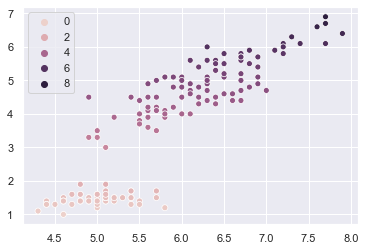

In [27]:
sns.scatterplot(xs, ys, hue=ys)
plt.show()

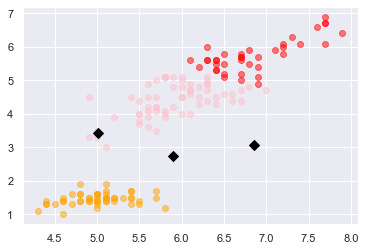

In [21]:
colors = {0: "red", 1: "orange", 2: "pink"}
for i in range(150):
    plt.scatter(xs[i], ys[i], c=colors[labels[i]], alpha=0.5)
# Get the coordinates of centroids(dimension=number of features)
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50, c="black")
plt.show()

## Evaluating Clustering
- We can check the correspondence with e.g. species
- Measure quality of a clustering
- Informs choice of how many clusters to look for

### Do the clusters corresponds to species?
● Clusters vs species is a "cross-tabulation"
● Use the pandas library
● Given the species of each sample as a list species

In [36]:
# 0->setosa,1->versicolor,2->virginica
Y_list = Y.tolist()
species_map = {0: "Setosa", 1: "Versicolour", 2: "Virginica"}
species = [species_map[i] for i in Y_list]

In [37]:
df = pd.DataFrame({"labels": labels, "species": species})
display(df.head())
cross_tab = pd.crosstab(df["labels"], df["species"])
display(cross_tab)
# We see that there is one to one correspondence between the species and labels

,labels,species
0,0,Setosa
1,0,Setosa
2,0,Setosa
3,0,Setosa
4,0,Setosa


species,Setosa,Versicolour,Virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


## In most datasets samples are not labelled by species
- In this case we use samples and there cluster labels for evaluating performance
- A good clustering has tight clusters, and
- Samples in each cluster are bunched together

## Inertia measures the clustering quality
- Measures how spread out the clusters are (lower is better)
- Distance from each sample to centroid of its cluster
- k-means attempts to minimize the inertia when choosing clusters

In [38]:
display(model.inertia_)

78.851441426146

## K-means inertia graph
- Clusterings of the iris dataset with different numbers of clusters
- More clusters means lower inertia
- A good clustering has tight clusters (so low inertia)
- ... but not too many clusters!
- Choose an "elbow" in the inertia plot
- Where inertia begins to decrease more slowly

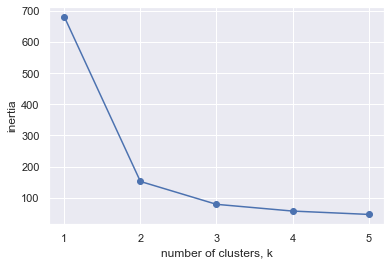

In [39]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()
# For iris dataset, 3 is a good choice

## Piedmont's wines dataset
- 178 samples from 3 distinct varieties of red wine: Barolo,Grignolino and Barbera
- features measure chemical composition e.g. alcohol content
- also visual properties like “color intensity”

In [42]:
df = pd.read_csv(r"./datasets/wine.csv")
display(df.head())
display(df.describe())
samples = df.drop(["class_name", "class_label"], axis=1).values
class_name = df["class_name"].values
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


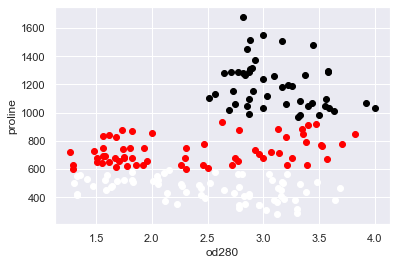

In [54]:
colors = {0: "red", 1: "white", 2: "black"}
xs = df["od280"].values
ys = df["proline"].values
for i in range(178):
    _ = plt.scatter(xs[i], ys[i], c=colors[labels[i]])
_ = plt.xlabel("od280")
_ = plt.ylabel("proline")
plt.show()

In [55]:
df2 = pd.DataFrame({"labels": labels, "class_name": class_name})
ct = pd.crosstab(df2["labels"], df2["class_name"])
display(ct)

class_name,Barbera,Barolo,Grignolino
labels,,,
0,29,13,20
1,19,0,50
2,0,46,1


## Wine features have very different variances! Therefore we need to normalize the data

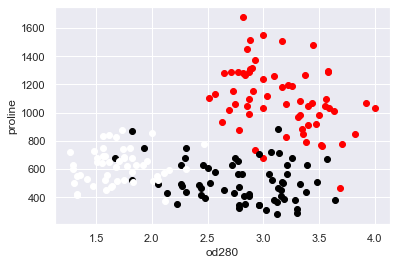

class_name,Barbera,Barolo,Grignolino
labels,,,
0,0,59,3
1,48,0,3
2,0,0,65


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# We can also use MaxAbsScaler and Normalizer
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)
for i in range(178):
    _ = plt.scatter(xs[i], ys[i], c=colors[labels[i]])
_ = plt.xlabel("od280")
_ = plt.ylabel("proline")
plt.show()
df2 = pd.DataFrame({"labels": labels, "class_name": class_name})
ct = pd.crosstab(df2["labels"], df2["class_name"])
display(ct)
# Now indeed we get cross tabulation results better!